In [1]:
# We are going to make a heatmap of the location + total number of significant SNPs in the observed data

import numpy as np
import pandas as pd

In [2]:
df_perms = {}

for i in range(1, 23):
    df_perms[i] = pd.read_csv(f"{i}_hundred_data.tsv", sep="\t")
    
# Note that the row number is the annotation, so df_perms[i][k] is annotation annotation[k] in chromosome i
annotations = ['3_prime_UTR_variant','5_prime_UTR_variant','NMD_transcript_variant','coding_sequence_variant','downstream_gene_variant','incomplete_terminal_codon_variant','intergenic_variant','intron_variant','mature_miRNA_variant','missense_variant','non_coding_transcript_exon_variant','non_coding_transcript_variant','splice_acceptor_variant','splice_donor_variant','splice_region_variant','start_lost','stop_gained','stop_lost','stop_retained_variant','synonymous_variant','upstream_gene_variant']

for i in range(1, 23):
    df_perms[i].set_axis(annotations, axis=0, inplace=True)
np_perms = {}

for i in range(1,23):
    np_perms[i] = df_perms[i].to_numpy()[:,0:]

    signsum = np.zeros(22) # the total number of significant SNPs per chromosome
    
# Count the number of sign SNPs in each annotation, that are greater than the original nr

np_original = {}
np_location = {}
np_original_loc = {}
a_matrix = {} # the locations of original annotations

for i in range(1, 23):
    np_original[i] = pd.read_csv(f"{i}permutationready.tsv", sep="\t").to_numpy()
    np_location[i] = np_original[i][::,1] # the ordinal location of significant SNPs
    np_original_loc[i] = np_original[i][:,2:] # the ordinal locations of different annotations 
                                                # (the columns are annotations)
    a_matrix[i] = np_original_loc[i].transpose()

for i in range(1,23):
    signsum[i-1] = np.sum(np_original[i][:,1])
    
# original number of sign snps per annotation per chrom

original_number = {}

for i in range(1,23):
    original_number[i] = np.matmul(a_matrix[i],np_location[i])


In [ ]:
from collections import Counter

dict_counter = {} # for all chromosomes

for i in range(1,23):
    
    dict_counter[i] = {} # dict_counter[i] is the counts for chromosome i

    for j in range(0,21):
            dict_counter[i][j] = Counter(np_perms[i][j,::]) # j is the annotation[j]

In [9]:
SNP_number = np.zeros((22,21))

for i in range(1,23):
    SNP_number[i-1,::] = original_number[i]

In [17]:
np.min(SNP_number)

0.0

[Text(0, 0.5, '1'),
 Text(0, 1.5, '2'),
 Text(0, 2.5, '3'),
 Text(0, 3.5, '4'),
 Text(0, 4.5, '5'),
 Text(0, 5.5, '6'),
 Text(0, 6.5, '7'),
 Text(0, 7.5, '8'),
 Text(0, 8.5, '9'),
 Text(0, 9.5, '10'),
 Text(0, 10.5, '11'),
 Text(0, 11.5, '12'),
 Text(0, 12.5, '13'),
 Text(0, 13.5, '14'),
 Text(0, 14.5, '15'),
 Text(0, 15.5, '16'),
 Text(0, 16.5, '17'),
 Text(0, 17.5, '18'),
 Text(0, 18.5, '19'),
 Text(0, 19.5, '20'),
 Text(0, 20.5, '21'),
 Text(0, 21.5, '22')]

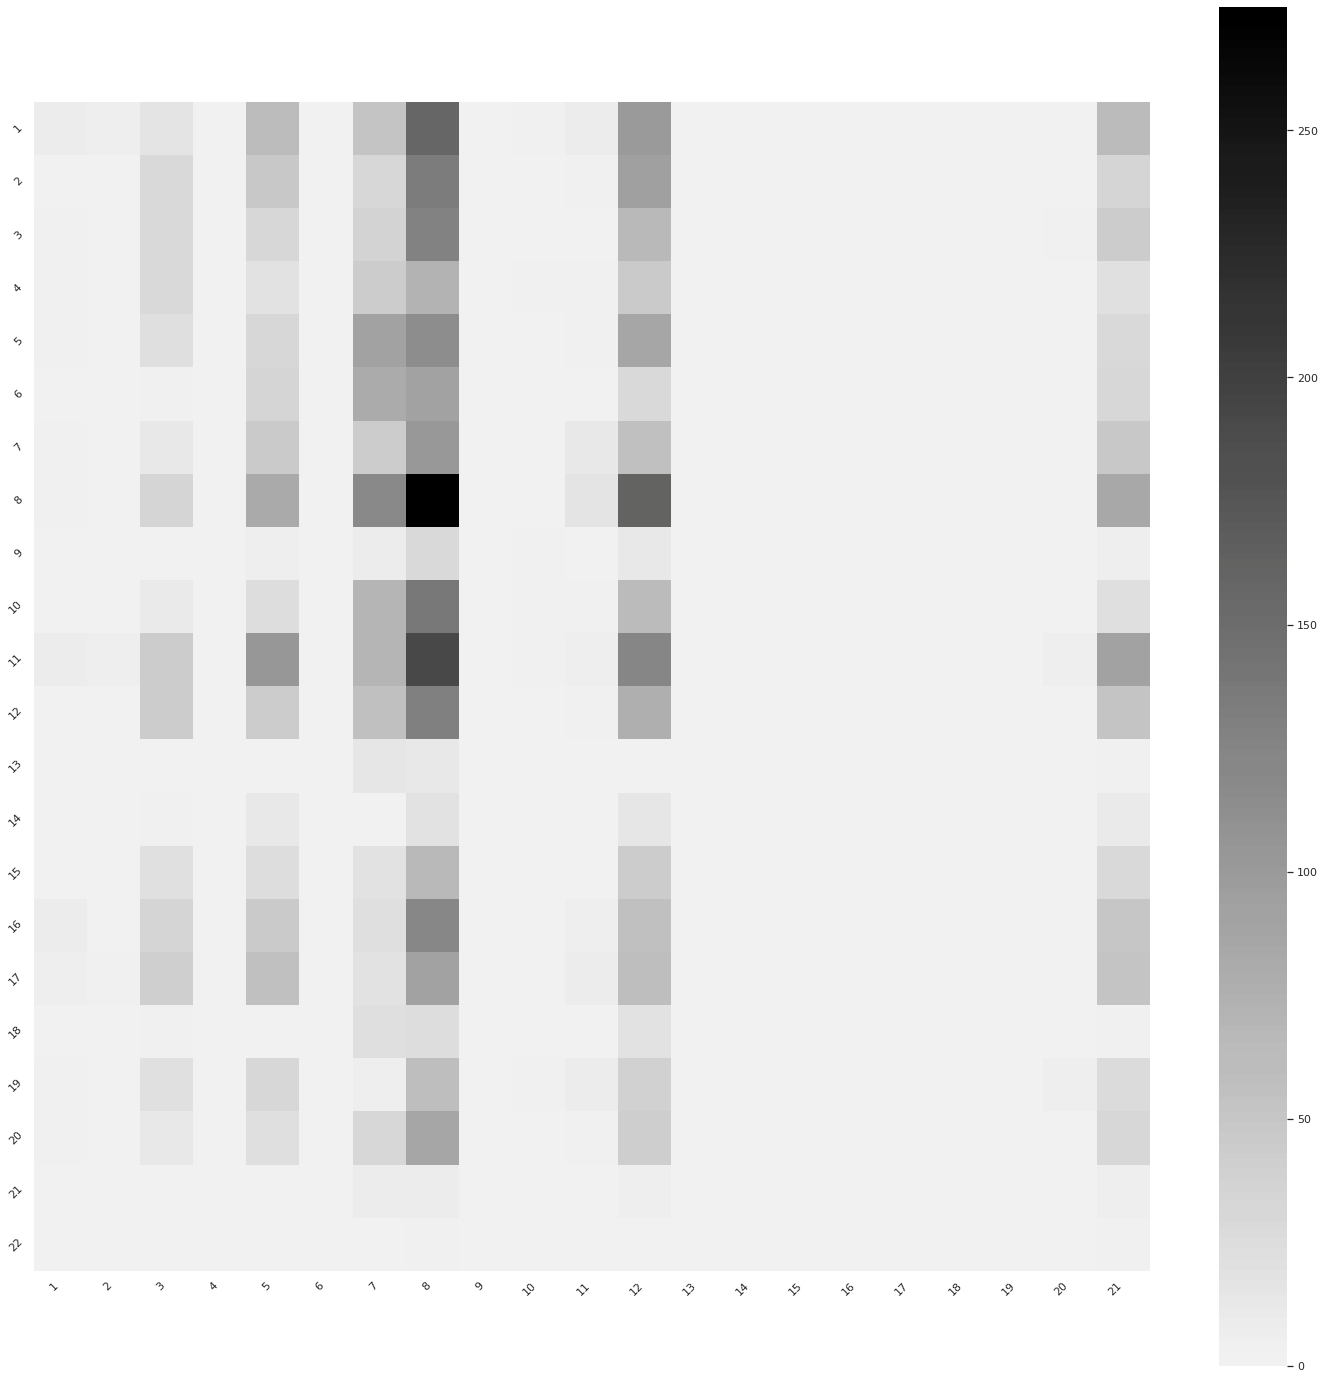

In [56]:
import seaborn as sns

mat1 = sns.heatmap(SNP_number, vmin = 0 , vmax = 275, center=0, cmap=sns.diverging_palette(0, 10, l=0, n=275, center='light'), linecolor='white', square=True)
sns.set(rc={'figure.figsize':(25,25)})

x = range(1,22)
y = range(1,23)
#mat1.set_ticks(np.arange(SNP_number.shape[1]), labels=col_labels)
mat1.set_xticklabels(x, rotation=45,horizontalalignment='right')
mat1.set_yticklabels(y, rotation=45,horizontalalignment='right')


In [ ]:
# calculating enrichment
enrichment_matrix = np.zeros((22,21))

for i in range(0,22):
# each row is the count nr in the corresponding chromosome n-1 (so row 0 corresponds to chrom 1)
    for k in range(0,21): # k is the annotation nr
        for l in dict_counter[i+1][k]: # l is number of sign SNP in annotation
            if l >= original_number[i+1][k]: # and original_number[i+1][k] != 0: 
                enrichment_matrix[i][k] = enrichment_matrix[i][k] + dict_counter[i+1][k][l] # freq_matrix[i+1][k][l] 
                                                                              # is nr of counts of l sign SNP 
                                                                              # in annotation
                        
p_vals_e = enrichment_matrix/100000

# Note: p_vals_e[i][j] is the enrichment of annotation j+1 in chromosome i+1